Initial Data Preview:
         Date        Close   ETH_Close
0   11/9/2017  7143.580078  320.884003
1  11/10/2017  6618.140137  299.252991
2  11/11/2017  6357.600098  314.681000
3  11/12/2017  5950.069824  307.907990
4  11/13/2017  6559.490234  316.716003
Some dates could not be parsed. Here are the rows:
     Date         Close    ETH_Close
4     NaT   6559.490234   316.716003
5     NaT   6635.750000   337.631012
6     NaT   7315.540039   333.356995
7     NaT   7871.689941   330.924011
8     NaT   7708.990234   332.394012
...   ...           ...          ...
2317  NaT  71396.593750  3883.140381
2318  NaT  69403.773440  3735.220215
2319  NaT  65315.117190  3522.860107
2320  NaT  68390.625000  3642.413086
2321  NaT  67675.695310  3517.985107

[1406 rows x 3 columns]
Correlation Matrix:
              Close  ETH_Close
Close      1.000000   0.928854
ETH_Close  0.928854   1.000000


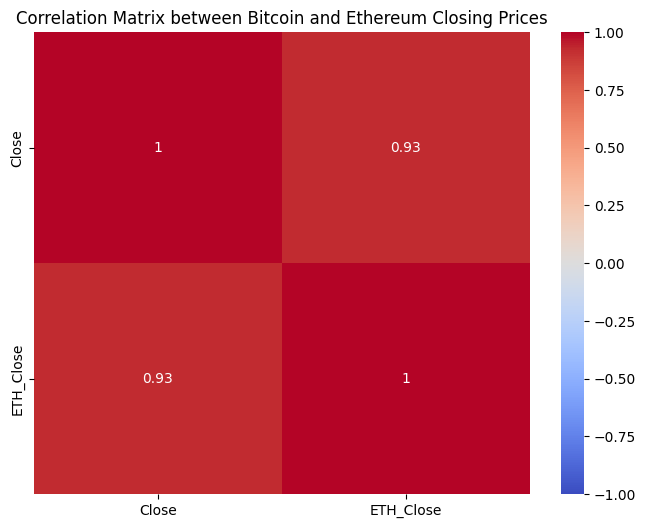

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('BTC-ETH.csv')

# Preview the data to check the date format
print("Initial Data Preview:")
print(df.head())

# Convert 'Date' column to datetime, handling errors
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')  # Adjusted format to '%d/%m/%Y'

# Check for rows where 'Date' could not be parsed
if df['Date'].isnull().any():
    print("Some dates could not be parsed. Here are the rows:")
    print(df[df['Date'].isnull()])

# Drop rows with invalid dates if any
df = df.dropna(subset=['Date'])

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Normalize 'Close' and 'ETH_Close' data
columns_to_normalize = ['Close', 'ETH_Close']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Compute correlation matrix for 'Close' and 'ETH_Close'
correlation_matrix = df[columns_to_normalize].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix between Bitcoin and Ethereum Closing Prices')
plt.show()


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.1310 - val_loss: 0.0678
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0772 - val_loss: 0.0270
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0410 - val_loss: 0.0027
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0217 - val_loss: 0.0061
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0206 - val_loss: 0.0042
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124 - val_loss: 5.6394e-04
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - val_loss: 7.3344e-04
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - val_loss: 2.8327e-04
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - val_loss: 2.2872e-04
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - val_loss: 8.0374e-04
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0034 - val_loss: 5.1408e-04
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss

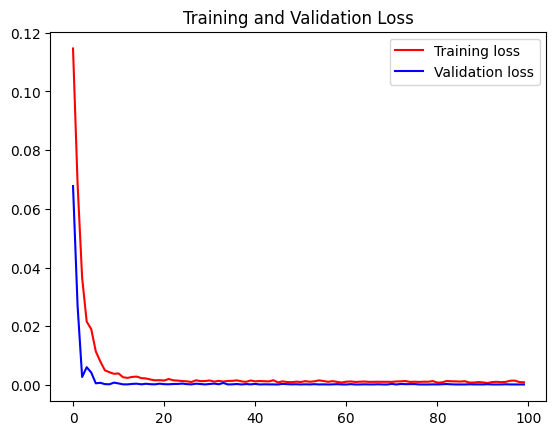

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


In [ ]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
import math

# Load and preprocess data
df = pd.read_csv('BTC-ETH.csv')
df = df[['Date', 'Close', 'ETH_Close']]
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Normalize data
scaler = MinMaxScaler()
df[['Close', 'ETH_Close']] = scaler.fit_transform(df[['Close', 'ETH_Close']])

# Define the windowing function
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)
    target_date = first_date
    dates = []
    X, Y = [], []

    while True:
        # Check if there's enough data to form a window
        if len(dataframe.loc[:target_date]) < n + 1:
            print(f'Not enough data to create window for date {target_date}. Skipping.')
            target_date += datetime.timedelta(days=1)
            if target_date > last_date:
                break
            continue

        df_subset = dataframe.loc[:target_date].tail(n+1)
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}. Skipping.')
            target_date += datetime.timedelta(days=1)
            if target_date > last_date:
                break
            continue

        close_values = df_subset['Close'].to_numpy()
        eth_close_values = df_subset['ETH_Close'].to_numpy()
        x = np.hstack([close_values[:-1].reshape(-1, 1), eth_close_values[:-1].reshape(-1, 1)])
        y = close_values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        if next_week.empty:
            break

        next_date = next_week.index[-1] + datetime.timedelta(days=1)
        if next_date > last_date:
            break

        target_date = next_date

    ret_df = pd.DataFrame({'Target Date': dates})
    X = np.array(X)

    # Ensure X is 3-dimensional
    if X.ndim == 2:
        X = X[:, :, np.newaxis]  # Add an extra dimension

    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i, 0]  # Bitcoin Close prices
        ret_df[f'ETH-{n-i}'] = X[:, i, 1]  # Ethereum Close prices

    ret_df['Target'] = Y
    return ret_df

# Create windowed data
windowed_df = df_to_windowed_df(df, '2018-02-01', '2024-08-08', n=3)

# Convert to numpy arrays
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), 3, 2))  # Ensure the correct shape
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

# Split data
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Define the model
model = Sequential()
model.add(layers.Input(shape=(3, 2)))  # (time_steps, num_features)
model.add(layers.LSTM(50, return_sequences=True, activation="tanh"))
model.add(layers.LSTM(50, activation="tanh"))
model.add(layers.Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(layers.Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predict and evaluate
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Rescale predictions and actual values back to original scale
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1, 1))
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))



In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain, train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain, train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain, train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest, test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest, test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest, test_predict))

Train data RMSE:  0.019089838266518253
Train data MSE:  0.00036442193
Train data MAE:  0.011163043
-------------------------------------------------------------------------------------
Test data RMSE:  0.016298499309749716
Test data MSE:  0.00026564108
Test data MAE:  0.010452042


In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9930639863014221
Test data explained variance regression score: 0.9910011887550354


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


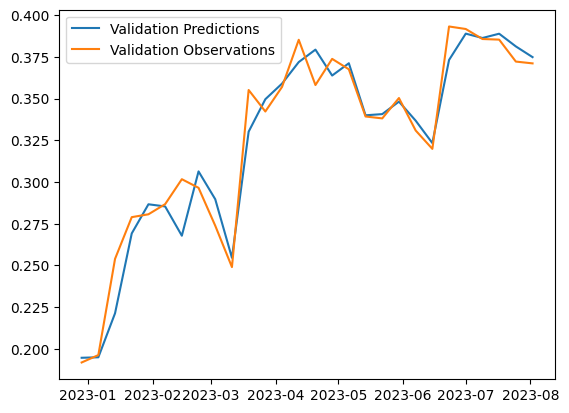

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


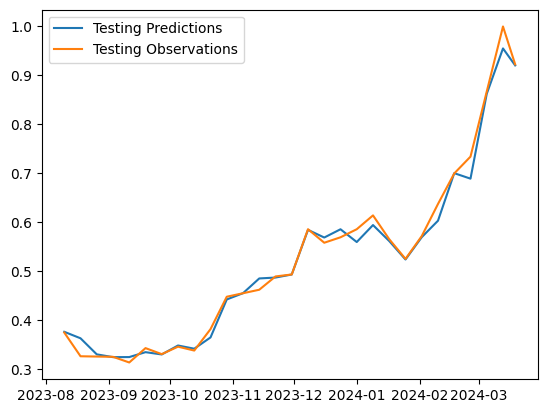

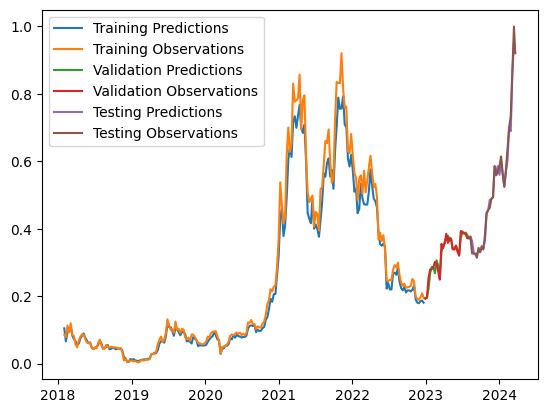

In [ ]:
# Plot predictions vs observations
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions, label='Validation Predictions')
plt.plot(dates_val, y_val, label='Validation Observations')
plt.legend()
plt.show()

test_predictions = model.predict(X_test).flatten()
plt.plot(dates_test, test_predictions, label='Testing Predictions')
plt.plot(dates_test, y_test, label='Testing Observations')
plt.legend()
plt.show()

plt.plot(dates_train, train_predict, label='Training Predictions')
plt.plot(dates_train, y_train, label='Training Observations')
plt.plot(dates_val, val_predictions, label='Validation Predictions')
plt.plot(dates_val, y_val, label='Validation Observations')
plt.plot(dates_test, test_predictions, label='Testing Predictions')
plt.plot(dates_test, y_test, label='Testing Observations')
plt.legend()
plt.show()